compare the sparsity between s3d and logitic regression


---

In [1]:
import pandas as pd

In [2]:
import palettable
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
color_list = pd.np.asarray(palettable.cartocolors.qualitative.Bold_7.mpl_colors)
color_list = color_list[[0,1,3]]

In [4]:
import json
name_pair_dict = json.load(open("../data/name_pair.json"))
name_pair_dict.keys()

dict_keys(['breastcancer', 'spambase', 'spectf', 'parkinsons', 'stackoverflow_cleaned_subset', 'khan_cleaned', 'digg', 'twitter', 'duolingo_cleaned', 'appenergy', 'building_sales', 'building_costs', 'pol', 'breastcancer_reg', 'boston_housing', 'triazines', 'parkinsons_motor', 'parkinsons_total'])

---

#### read data

this file comes from `1-hyperparameter.ipynb`

In [5]:
s3d_hyperparameter_df = pd.read_csv('s3d_hyperparameter_df.csv')
s3d_hyperparameter_df.columns = ['data_name', 'type_', 'split_version', 'lambda_', 'num_features']
s3d_hyperparameter_df.head(2)

,data_name,type_,split_version,lambda_,num_features
0,breastcancer,classification,0,0.0010,2
1,breastcancer,classification,1,0.0003,1


In [6]:
s3d_sparsity_df = s3d_hyperparameter_df[['data_name', 'type_', 'num_features', 'split_version']]
s3d_sparsity_df['model_name'] = 's3d'
s3d_sparsity_df.head(2)

,data_name,type_,num_features,split_version,model_name
0,breastcancer,classification,2,0,s3d
1,breastcancer,classification,1,1,s3d


In [7]:
s3d_sparsity_df.data_name.unique().size, set(s3d_sparsity_df.data_name) == set(name_pair_dict)

(18, True)

In [8]:
bm_sparsity_df = list()
for data_name, type_ in s3d_hyperparameter_df[['data_name', 'type_']].drop_duplicates().values:
    for cls_ in ['lasso', 'elasticnet']:
        df = pd.read_csv('{}/bm-performance/{}-{}-feature_rankings.csv'.format(type_, data_name, cls_),
                          index_col=0)
        #print(lasso_df[lasso_df.columns[:-1]])
        ## if the coefficient is less than 10^-8?
        #print((lasso_df[lasso_df.columns[:-1]].values).sum(axis=1))
        zero_coef = (df[df.columns[:-1]].values!=0).sum(axis=1)
        zero_coef_df = pd.DataFrame({'num_features': zero_coef, 'split_version': pd.np.arange(5)})
        zero_coef_df['data_name'] = data_name
        zero_coef_df['model_name'] = cls_
        zero_coef_df['type_'] = type_
        bm_sparsity_df.append(zero_coef_df)
bm_sparsity_df = pd.concat(bm_sparsity_df, ignore_index=True, sort=True)
bm_sparsity_df.head(2)

,data_name,model_name,num_features,split_version,type_
0,breastcancer,lasso,8,0,classification
1,breastcancer,lasso,8,1,classification


In [9]:
bm_sparsity_df.data_name.unique().size

18

In [10]:
sparsity_df = s3d_sparsity_df.append(bm_sparsity_df, ignore_index=True, sort=True)
sparsity_df.head(2)

,data_name,model_name,num_features,split_version,type_
0,breastcancer,s3d,2,0,classification
1,breastcancer,s3d,1,1,classification


In [11]:
sparsity_df.data_name.unique().size

18

In [12]:
sparsity_df.model_name.value_counts()

s3d           90
elasticnet    90
lasso         90
Name: model_name, dtype: int64

---

#### bar chart

In [13]:
sparsity_df.head(2)

,data_name,model_name,num_features,split_version,type_
0,breastcancer,s3d,2,0,classification
1,breastcancer,s3d,1,1,classification


##### classification

In [14]:
data_list = [
             "breastcancer", "spambase", "spectf", "parkinsons",
             "stackoverflow_cleaned_subset", "khan_cleaned",
             "digg", "twitter", "duolingo_cleaned"
            ]

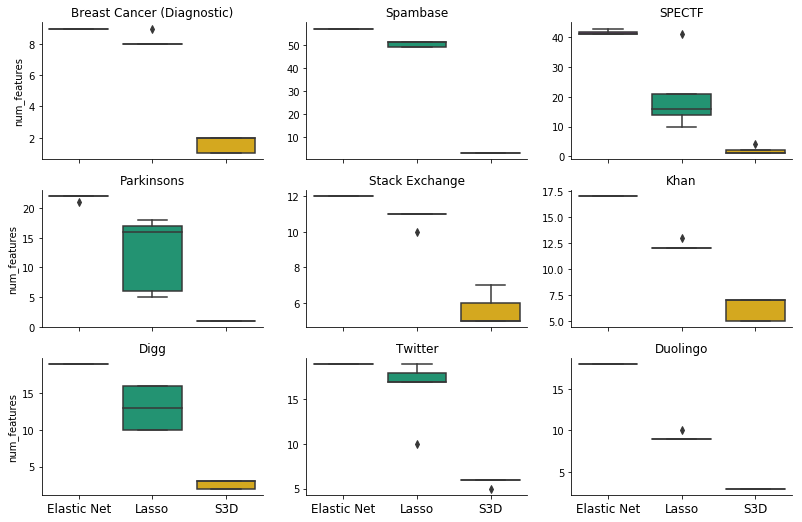

In [16]:
g = sns.factorplot(x='model_name', y='num_features',
                   col_order=data_list, aspect=1.5, size=2.5,
                   order=['elasticnet', 'lasso', 's3d'],
                   data=sparsity_df.query("type_=='classification'"), 
                   col_wrap=3, col='data_name', 
                   #kind='bar',
                   kind='box',
                   palette=color_list, sharey=False,
                  )
for ax_i in g.axes:
    ax_i.set_title(name_pair_dict[ax_i.get_title().split(' = ')[-1]])
g.set_xlabels('')
g.set_xticklabels(['Elastic Net', 'Lasso', 'S3D'], size=12)

##### regression

In [17]:
data_list = ["appenergy", "building_sales", "building_costs",
             "pol", "breastcancer_reg",  
             "boston_housing", "triazines",
             "parkinsons_motor", "parkinsons_total",
            ]

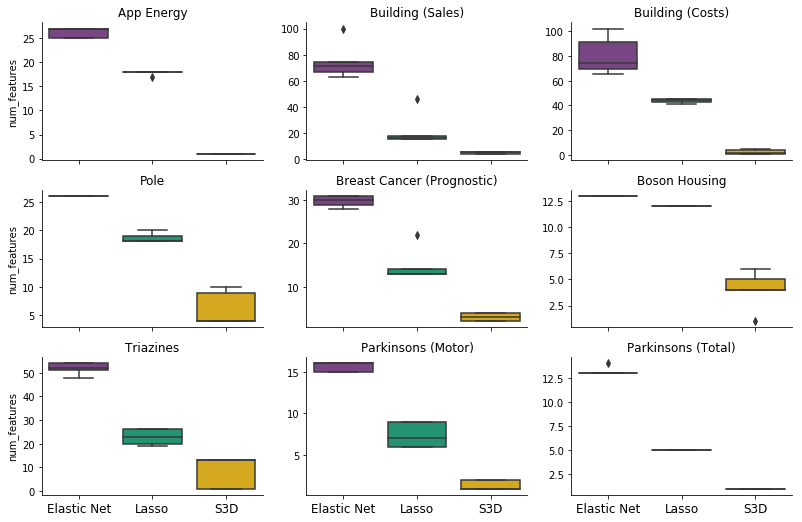

In [18]:
g = sns.factorplot(x='model_name', y='num_features',
                   col_order=data_list, aspect=1.5, size=2.5,
                   order=['elasticnet', 'lasso', 's3d'],
                   data=sparsity_df.query("type_!='classification'"), 
                   col_wrap=3, col='data_name', 
                   #kind='bar',
                   kind='box',
                   palette=color_list, sharey=False,
                  )
for ax_i in g.axes:
    ax_i.set_title(name_pair_dict[ax_i.get_title().split(' = ')[-1]])
g.set_xlabels('')
g.set_xticklabels(['Elastic Net', 'Lasso', 'S3D'], size=12)

##### one bar chart

In [19]:
data_list = [
             "breastcancer", "spambase", "spectf", "parkinsons",
             "stackoverflow_cleaned_subset", "khan_cleaned",
             "digg", "twitter", "duolingo_cleaned",
             "appenergy", "building_sales", "building_costs",
             "pol", "breastcancer_reg",  
             "boston_housing", "triazines",
             "parkinsons_motor", "parkinsons_total",
            ]

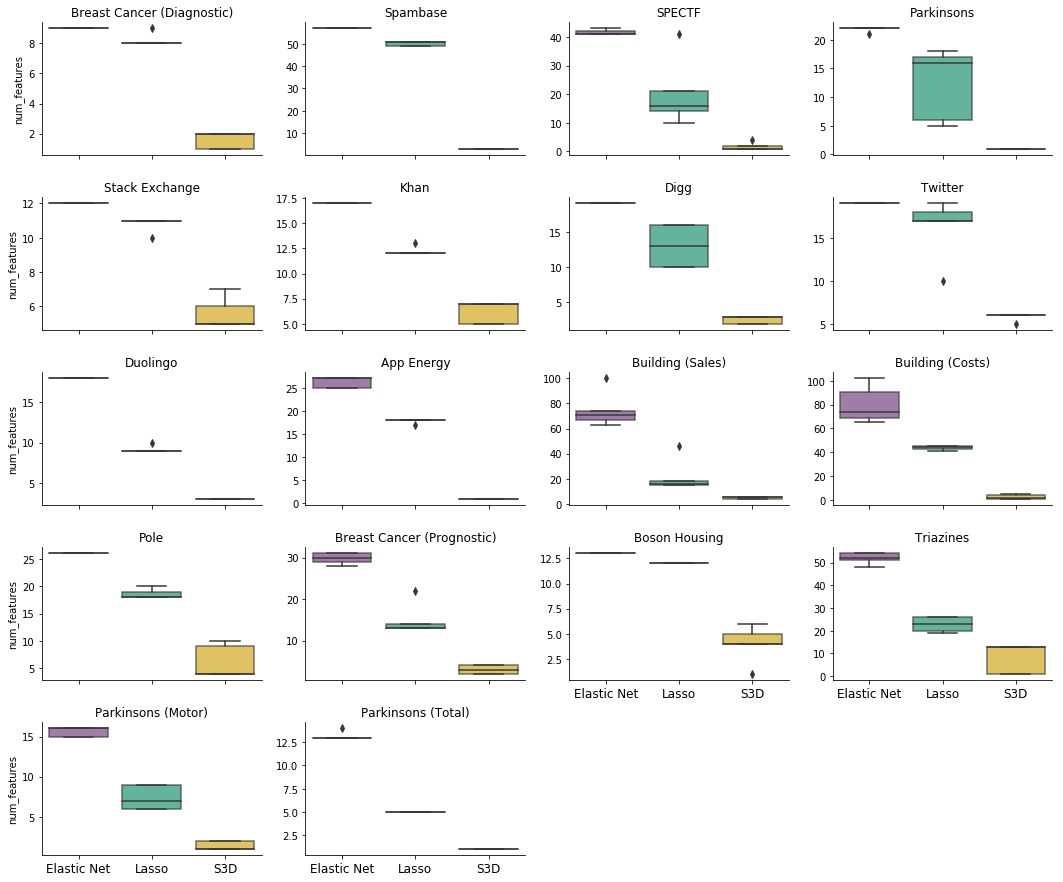

In [33]:
g = sns.factorplot(x='model_name', y='num_features',
                   col_order=data_list, aspect=1.5, size=2.5,
                   order=['elasticnet', 'lasso', 's3d'],
                   data=sparsity_df,
                   width=0.8, boxprops=dict(alpha=.7),
                   #col_wrap=4, col='data_name', kind='bar',
                   col_wrap=4, col='data_name', kind='box',
                   palette=color_list, sharey=False,
                  )
for ax_i in g.axes:
    ax_i.set_title(name_pair_dict[ax_i.get_title().split(' = ')[-1]])
g.set_xlabels('')
g.set_xticklabels(['Elastic Net', 'Lasso', 'S3D'], size=12)